<a href="https://colab.research.google.com/github/cbonnin88/Soundstream/blob/main/Sound_stream_retention_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown as gd
import plotly.graph_objects as go

In [ ]:
url = "https://drive.google.com/uc?id=1mT1mvIkEliFfRP4JPC7dTjrdy412zs1x"
gd.download(url,"Soundstream_user_data.csv",quiet=True)

df_userdata = pd.read_csv('Soundstream_user_data.csv')
df_userdata.head(10)

,user_id,signup_date,action,timestamp,subscription_type,device,monthly_revenue
0,user_635,2024-05-19,upgrade_premium,2024-12-11 9:44:07,premium,mobile,10
1,user_343,2024-05-07,like_song,2024-10-26 21:53:35,free,mobile,0
2,user_185,2024-05-24,like_song,2024-11-17 22:32:06,premium,desktop,10
3,user_613,2024-05-16,logout,2024-11-02 11:43:13,premium,mobile,10
4,user_407,2024-05-20,create_playlist,2024-08-24 8:56:55,premium,mobile,10
5,user_787,2024-05-25,create_playlist,2024-08-31 1:21:19,premium,mobile,10
6,user_161,2024-05-28,upgrade_premium,2024-10-02 15:49:51,premium,desktop,10
7,user_33,2024-05-22,stream_song,2024-09-17 21:22:07,premium,desktop,10
8,user_878,2024-05-04,like_song,2024-11-13 15:40:41,free,mobile,0
9,user_209,2024-05-27,stream_song,2024-12-21 11:00:06,free,desktop,0


In [ ]:
df_userdata['timestamp'] = pd.to_datetime(df_userdata['timestamp'])
df_userdata['signup_date'] = pd.to_datetime(df_userdata['signup_date'])

df_userdata['days_since_signup']= (df_userdata['timestamp']- df_userdata['signup_date']).dt.days

In [ ]:
# Getting the total number of users per subscription type
signup_users= df_userdata.groupby('subscription_type')['user_id'].nunique().reset_index()
signup_users.rename(columns={'user_id':'total_users'}, inplace=True)

In [ ]:
# Grouping by days since signup. and subscription type
retention_data = (
    df_userdata[df_userdata['days_since_signup']>=0]
    .groupby(['subscription_type','days_since_signup'])['user_id']
    .nunique()
    .reset_index()
)

In [ ]:
# Merging total signup data
retention_data = retention_data.merge(signup_users, on='subscription_type')

In [ ]:
# Calculating our retention rate
retention_data['retention_rate']= retention_data['user_id'] / retention_data['total_users']

print(retention_data['retention_rate'].mean())

0.020759868880959473


In [ ]:
# Filtering for Day-1, Day-7, Day-30
key_days=[1,7,30]
filtered_data = retention_data[retention_data['days_since_signup'].isin(key_days)]

In [ ]:
print(filtered_data)

    subscription_type  days_since_signup  user_id  total_users  retention_rate
0                free                  1        1          993        0.001007
5                free                  7        8          993        0.008056
28               free                 30       27          993        0.027190
240           premium                  1        1          994        0.001006
245           premium                  7        2          994        0.002012
268           premium                 30       22          994        0.022133


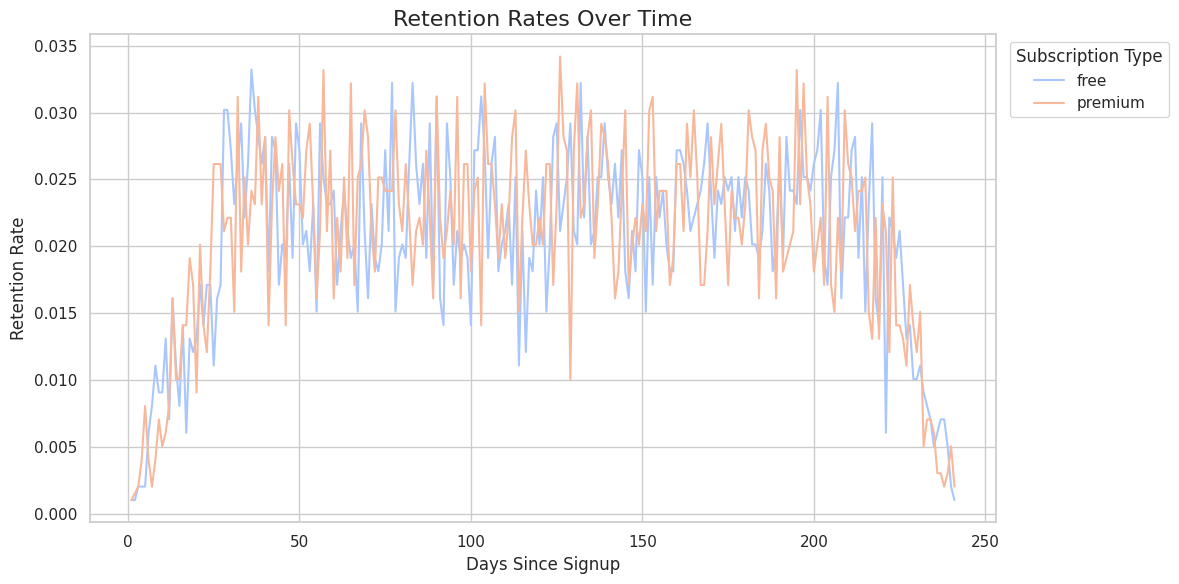

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(
    data=retention_data,
    x='days_since_signup',
    y='retention_rate',
    hue='subscription_type',
    palette='coolwarm'
)

plt.title('Retention Rates Over Time', fontsize=16)
plt.xlabel('Days Since Signup', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.legend(title='Subscription Type', loc='upper right',bbox_to_anchor=(1.2,1))
plt.tight_layout()

plt.show()

# **Adding A Filter for Subscription Type**

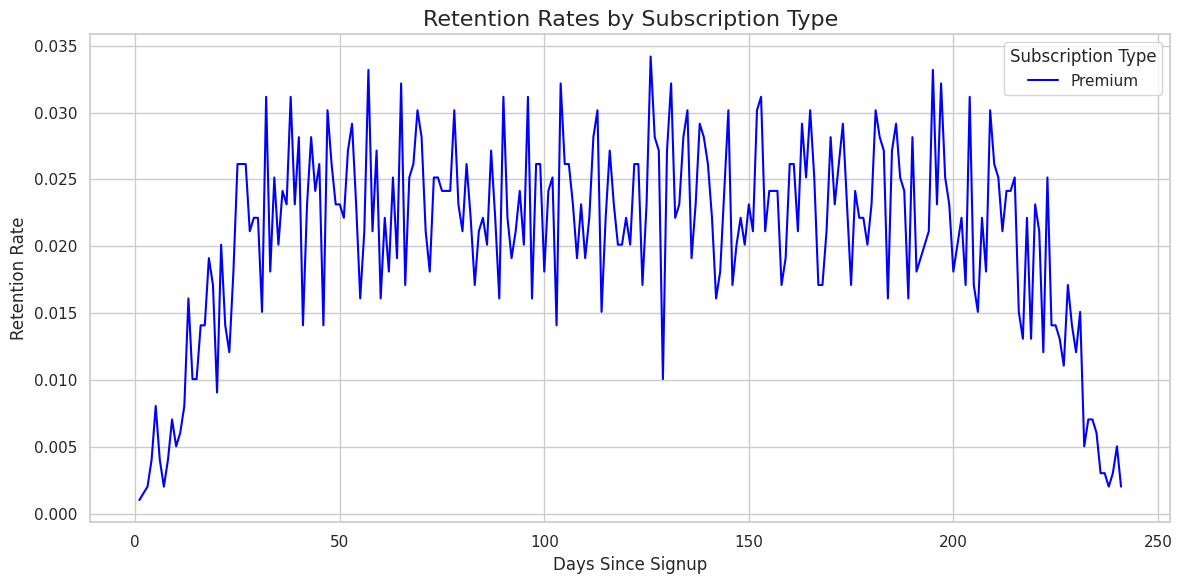

In [ ]:
# Premium users
premium_retention = retention_data[retention_data['subscription_type']=='premium']

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=premium_retention,
    x='days_since_signup',
    y='retention_rate',
    label='Premium',
    color='blue'
)

# Customize the plot
plt.title('Retention Rates by Subscription Type', fontsize=16)
plt.xlabel('Days Since Signup', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.legend(title='Subscription Type')
plt.tight_layout()

plt.show()

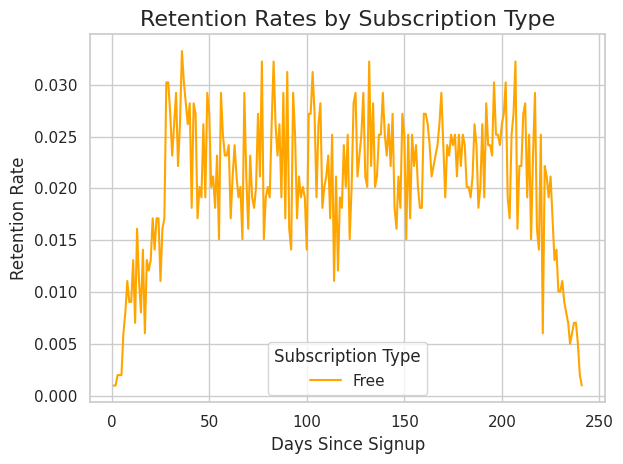

In [ ]:
# Free Users
free_retention= retention_data[retention_data['subscription_type']=='free']

sns.lineplot(
    data=free_retention,
    x='days_since_signup',
    y='retention_rate',
    label='Free',
    color='orange'
)

# Customize the plot
plt.title('Retention Rates by Subscription Type', fontsize=16)
plt.xlabel('Days Since Signup', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.legend(title='Subscription Type')
plt.tight_layout()

plt.show()

# **What if we incread our retention rate by 5 or 10 percent ?**

In [ ]:
current_retention_rate = retention_data['retention_rate'].mean()
current_active_users = df_userdata['user_id'].nunique()
retained_users = current_active_users * current_retention_rate

print(retained_users)

20.759868880959473


In [ ]:
improved_five_percent_rate = current_retention_rate + 0.05
improved_ten_percent_rate = current_retention_rate + 0.10

retained_users_five = current_active_users * improved_five_percent_rate
retained_users_ten = current_active_users * improved_ten_percent_rate

scenarios = {
    "Current Retention:": retained_users,
    "5% Improvement:": retained_users_five,
    "10% Improvement:": retained_users_ten
}

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(scenarios.keys()),
    y=list(scenarios.values()),
    marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c']),
    text=[f"{int(val):,}" for val in scenarios.values()],
    textposition='auto'
))

fig.update_layout(
    title="Simulated Impact of Retention Improvement",
    xaxis_title="Scenario",
    yaxis_title="Retained Users",
    template="plotly_white",
    title_font_size=16
)

fig.show()

# **How does improved Retention Rates improve our Revenue ?**

In [ ]:
arpu = df_userdata['monthly_revenue'].mean()

In [ ]:
revenue_current = retained_users * arpu
revenue_five = retained_users_five * arpu
revenue_ten = retained_users_ten * arpu

revenue_retention_scenarios = {
    "Current Retention": revenue_current,
    "5% Improvement": revenue_five,
    "10% Improvement": revenue_ten
}

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(revenue_retention_scenarios.keys()),
    y=list(revenue_retention_scenarios.values()),
    marker=dict(color=['#636EFA', '#EF553B', '#00CC96']),
    text=[f"€{val:,.2f}" for val in revenue_retention_scenarios.values()],
    textposition='auto'
))

fig.update_layout(
    title="Simulated Revenue Impact of Retention Improvements",
    xaxis_title="Scenario",
    yaxis_title="Total Revenue (EUR)",
    template="plotly_white",
    title_font_size=16,
    xaxis_tickangle=-45
)

fig.show()